In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

In [2]:
img = image.load_img("C:\\Users\\adars\\Desktop\\Finaldataset\\Apple\\fresh-red-apple-1647255689-6243360.jpeg")


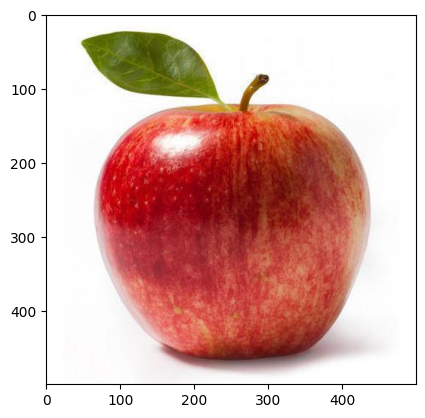

In [3]:
plt.imshow(img)

In [5]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

GPU is available


In [23]:
train_dataset = train.flow_from_directory("C:\\Users\\adars\\Desktop\\Finaldataset\\Train",
                                         target_size=(32, 32),
                                         batch_size=32,
                                         class_mode='categorical') 

Found 709 images belonging to 21 classes.


In [11]:
train_dataset.class_indices


{'Apple': 0,
 'Chicken Biriyani': 1,
 'Chicken Curry': 2,
 'Corn': 3,
 'Dal Chawal': 4,
 'Fish Curry': 5,
 'Idli': 6,
 'Jalebi': 7,
 'Kaju Katli': 8,
 'Ladoo': 9,
 'Maggie': 10,
 'Mango': 11,
 'Masala Dosa': 12,
 'Noodles': 13,
 'Omblet': 14,
 'Onion': 15,
 'Pizza': 16,
 'Potato': 17,
 'Roti': 18,
 'Salad': 19,
 'Samosa': 20}

In [26]:
validation_dataset = train.flow_from_directory("C:\\Users\\adars\\Desktop\\Finaldataset\\Valid",
                                              target_size=(32,32),
                                              batch_size=32,
                                              class_mode='categorical')

Found 709 images belonging to 21 classes.


In [27]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')  # Updated to match the number of classes in your dataset
])


In [40]:
from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.optimizers import Adam

# Assuming you have a model defined above this point
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


In [41]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=50,
    validation_data=validation_dataset,
    validation_steps=len(validation_dataset),
    verbose=1
)

Epoch 1/50
23/23 [==============================] - 6s 235ms/step - loss: 0.6358 - accuracy: 0.8632 - val_loss: 0.2064 - val_accuracy: 0.9619
Epoch 2/50
23/23 [==============================] - 4s 165ms/step - loss: 0.3883 - accuracy: 0.8829 - val_loss: 0.9418 - val_accuracy: 0.7165
Epoch 3/50
23/23 [==============================] - 4s 159ms/step - loss: 0.3388 - accuracy: 0.9083 - val_loss: 0.1833 - val_accuracy: 0.9647
Epoch 4/50
23/23 [==============================] - 3s 155ms/step - loss: 0.2600 - accuracy: 0.9224 - val_loss: 0.1992 - val_accuracy: 0.9506
Epoch 5/50
23/23 [==============================] - 3s 154ms/step - loss: 0.2113 - accuracy: 0.9464 - val_loss: 0.1429 - val_accuracy: 0.9774
Epoch 6/50
23/23 [==============================] - 3s 154ms/step - loss: 0.1976 - accuracy: 0.9450 - val_loss: 0.1576 - val_accuracy: 0.9605
Epoch 7/50
23/23 [==============================] - 3s 154ms/step - loss: 0.3187 - accuracy: 0.9055 - val_loss: 0.0759 - val_accuracy: 0.9929
Epoch 

In [42]:
class_indices = {'Apple': 0,
 'Chicken Biriyani': 1,
 'Chicken Curry': 2,
 'Corn': 3,
 'Dal Chawal': 4,
 'Fish Curry': 5,
 'Idli': 6,
 'Jalebi': 7,
 'Kaju Katli': 8,
 'Ladoo': 9,
 'Maggie': 10,
 'Mango': 11,
 'Masala Dosa': 12,
 'Noodles': 13,
 'Omblet': 14,
 'Onion': 15,
 'Pizza': 16,
 'Potato': 17,
 'Roti': 18,
 'Salad': 19,
 'Samosa': 20}

# Extract class names and sort them based on their indices
class_names = [name for name, index in sorted(class_indices.items(), key=lambda x: x[1])]

print(class_names)


['Apple', 'Chicken Biriyani', 'Chicken Curry', 'Corn', 'Dal Chawal', 'Fish Curry', 'Idli', 'Jalebi', 'Kaju Katli', 'Ladoo', 'Maggie', 'Mango', 'Masala Dosa', 'Noodles', 'Omblet', 'Onion', 'Pizza', 'Potato', 'Roti', 'Salad', 'Samosa']


In [64]:
dir_path = 'C:\\Users\\adars\\Desktop\\Finaldataset\\Test'

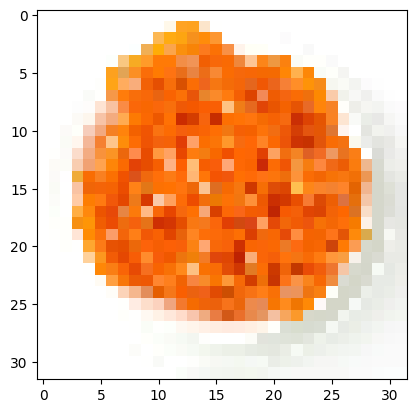

1/1 [==============================] - 0s 66ms/step
Predicted class: Jalebi
Class index: 7
Predicted probability: 1.0000
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


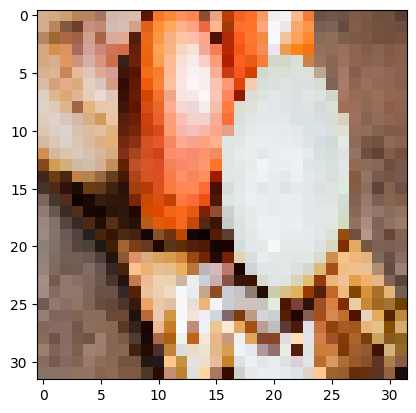

1/1 [==============================] - 0s 16ms/step
Predicted class: Onion
Class index: 15
Predicted probability: 1.0000
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [120]:
for i in os.listdir(dir_path):
    img = image.load_img(os.path.join(dir_path, i), target_size=(32, 32))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    predictions = model.predict(images)
    
    # Get the class index with the highest probability
    predicted_class_index = np.argmax(predictions[0])
    
    # Get the corresponding class name
    predicted_class_name = class_names[predicted_class_index]
    
    # Get the actual probability value
    predicted_probability = predictions[0][predicted_class_index]
    
    print(f"Predicted class: {predicted_class_name}")
    print(f"Class index: {predicted_class_index}")
    print(f"Predicted probability: {predicted_probability:.4f}")
    print(predictions)


In [119]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=len(test_dataset))
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


8/8 [==============================] - 2s 138ms/step - loss: 0.0018 - accuracy: 1.0000
Test Accuracy: 100.00%


In [69]:
import pandas as pd


In [113]:
food_data = pd.read_csv("C:\\Users\\adars\\Desktop\\nuti.csv")

In [ ]:
# desired_food_name = predicted_class_name
# if desired_food_name in food_data['Food'].values:
#     food_details = food_data[food_data['Food'] == desired_food_name]
#     print("\nDetails for", desired_food_name, ":\n")
#     print(food_details)
# else:
#     print(f"\n{desired_food_name} not found in the DataFrame.")


In [114]:
if predicted_class_name in food_data['Food'].values:
        # Get the details of that specific food
        food_details = food_data[food_data['Food'] == predicted_class_name]
        print("\nDetails for", predicted_class_name, ":\n")
        print(food_details)

        # Store details in the dictionary
        all_details[predicted_class_name] = food_details
else:
        print(f"\n{predicted_class_name} not found in the DataFrame.")


Details for Pizza :

     Food  Calories (kcal)  Carbohydrates (g)  Protein (g)  Fat (g)  \
16  Pizza              650               25.0         10.0     12.5   

    Fiber (g) Vitamin A (IU) Vitamin C (mg) Calcium (mg) Iron (mg)  
16        1.5              -              -            -         -  


In [115]:
all_details_df = pd.concat(all_details.values(), ignore_index=True)
print(all_details)


{'Chicken Biriyani':                Food  Calories (kcal)  Carbohydrates (g)  Protein (g)  Fat (g)  \
1  Chicken Biriyani              450               55.0         22.5     17.5   

   Fiber (g) Vitamin A (IU) Vitamin C (mg) Calcium (mg) Iron (mg)  
1        2.5              -              -            -         -  , 'Chicken Curry':             Food  Calories (kcal)  Carbohydrates (g)  Protein (g)  Fat (g)  \
2  Chicken Curry              350               12.5         22.5     17.5   

   Fiber (g) Vitamin A (IU) Vitamin C (mg) Calcium (mg) Iron (mg)  
2        2.5              -              -            -         -  , 'Dal Chawal':          Food  Calories (kcal)  Carbohydrates (g)  Protein (g)  Fat (g)  \
4  Dal Chawal              350               55.0         17.5      7.5   

   Fiber (g) Vitamin A (IU) Vitamin C (mg) Calcium (mg) Iron (mg)  
4       12.5              -              -            -         -  , 'Pizza':      Food  Calories (kcal)  Carbohydrates (g)  Protein (g

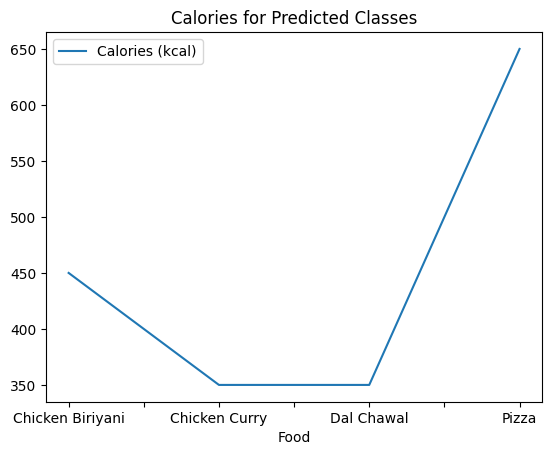

In [117]:
# Visualize the data in a bar chart (you can customize this based on your requirements)
all_details_df.plot(kind='line', x='Food', y='Calories (kcal)', title='Calories for Predicted Classes')
plt.show()